In [1]:
#for Standardization mean =0
#for Standardization standard deviation =1
#both properties holds for Data set

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
# Import data using datetime and set index to datetime
df = pd.read_csv(r'C:\Users\91783\Desktop\DataSet\1_Bhiwadi\Book_1_PM.csv',
                                parse_dates=['Date'],
                                index_col=['Date'])

df.head()

,PM2.5
Date,
2021-01-01,228.53
2021-02-01,222.37
2021-03-01,128.14
2021-04-01,68.44
2021-05-01,62.51


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2021-01-01 to 2021-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


<AxesSubplot:>

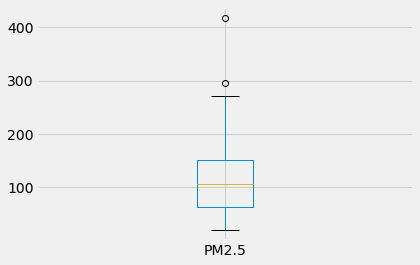

In [6]:
#Box plot
#pd.options.display.mpl_style = False
df.boxplot()

In [7]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [8]:
# the scaler object (model)
scaler = StandardScaler()

In [9]:
# fit and transform the data
scaled_data = scaler.fit_transform(df)

In [10]:
print(df)

             PM2.5
Date              
2021-01-01  228.53
2021-02-01  222.37
2021-03-01  128.14
2021-04-01   68.44
2021-05-01   62.51
...            ...
2021-12-27   92.11
2021-12-28  124.25
2021-12-29  105.15
2021-12-30  161.22
2021-12-31  156.41

[365 rows x 1 columns]


In [11]:
print(scaled_data.shape)
#print('X' ,X.shape)

(365, 1)


In [12]:
print(scaled_data)

[[ 2.01127500e+00]
 [ 1.90598451e+00]
 [ 2.95347690e-01]
 [-7.25081241e-01]
 [-8.26440429e-01]
 [ 2.07320738e-01]
 [ 1.41685109e-01]
 [ 1.82023673e-01]
 [ 7.84367316e-01]
 [ 1.45103631e-01]
 [-3.54513415e-01]
 [ 2.83553788e-01]
 [ 1.35782445e+00]
 [ 1.66685887e+00]
 [ 1.73283635e+00]
 [ 1.27612176e+00]
 [ 7.26081510e-01]
 [ 9.42132124e-01]
 [ 1.28740288e+00]
 [-3.63059721e-01]
 [ 2.31592247e-01]
 [ 7.97699554e-01]
 [-8.03479198e-02]
 [ 1.21629762e+00]
 [ 9.24697660e-01]
 [ 3.87476868e-01]
 [ 4.83537347e-01]
 [ 1.37081483e+00]
 [ 6.39080115e-01]
 [ 2.83211935e-01]
 [ 2.31421321e-01]
 [ 9.87256619e-01]
 [ 1.25116655e+00]
 [-1.00688128e-01]
 [-3.91433456e-01]
 [ 1.45616410e-01]
 [-2.15493348e-02]
 [-1.49402072e-01]
 [ 3.42181446e-01]
 [ 2.74323777e-01]
 [ 6.04952023e-02]
 [ 1.02195462e+00]
 [ 9.10510792e-01]
 [ 1.46841364e+00]
 [ 8.92050771e-01]
 [ 7.33944111e-01]
 [ 4.23713205e-01]
 [ 1.08519729e+00]
 [ 1.67096110e+00]
 [ 1.07425801e+00]
 [ 1.96438598e-02]
 [ 2.40879389e-02]
 [-1.9076619

In [13]:
#for Standardization mean =0
scaled_data.mean(axis = 0)
#df([0., 0.])

array([1.16801546e-16])

In [14]:
#for Standardization standard deviation =1
scaled_data.std(axis = 0)
#array([1., 1.])

array([1.])

In [15]:
#Creating a window for previous data
def to_supervised(train):
    window_size = 4
    X = []
    Y = []
    for i in range(window_size, len(train)):
        X.append(train[i-window_size:i,:])
        Y.append(train[i,0:1])
    
    return X,Y

In [16]:
X, Y = to_supervised(scaled_data)
X = np.array(X)
Y = np.array(Y)
print('Y' ,Y.shape)
print('X' ,X.shape)

Y (361, 1)
X (361, 4, 1)


In [17]:
X

array([[[ 2.011275  ],
        [ 1.90598451],
        [ 0.29534769],
        [-0.72508124]],

       [[ 1.90598451],
        [ 0.29534769],
        [-0.72508124],
        [-0.82644043]],

       [[ 0.29534769],
        [-0.72508124],
        [-0.82644043],
        [ 0.20732074]],

       ...,

       [[ 1.37953206],
        [ 1.44345843],
        [-0.32049912],
        [ 0.22885743]],

       [[ 1.44345843],
        [-0.32049912],
        [ 0.22885743],
        [-0.09761146]],

       [[-0.32049912],
        [ 0.22885743],
        [-0.09761146],
        [ 0.86077129]]])

In [18]:
#Splitting the dataset 365*0.2=73
#Splitting the dataset 365*0.3=110
n_train = 61
X_train, X_test = X[n_train:,] , X[:n_train,]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

Y_train, Y_test = Y[n_train:,] , Y[:n_train,]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)

X_train (300, 4, 1)
X_test (61, 4, 1)
Y_train (300, 1)
Y_test (61, 1)


In [19]:
#Importing LSTM model
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM
import tensorflow as tf
model = Sequential()

#units means number of neurons
model.add(LSTM(units = 100, return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 100))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

 
#opt1 = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.0, nesterov=False, name="SGD")

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=opt)

In [20]:
def call(c):
    history = model.fit(X_train, Y_train, epochs=c,
                    batch_size=8, validation_data=(X_test, Y_test),
                    verbose=2, shuffle=False)
    def model_loss(history):
        plt.figure(figsize=(8,4))
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Test Loss')
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epochs')
        plt.legend(loc='upper right')
        plt.show();
        
    #Taking predictions
    Y_pred = model.predict(X_test)
    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(Y_test, Y_pred)
    print('MSE')
    print(mse)
    rmse = np.sqrt(mse)
    print('RMSE')
    print(rmse)
    mae = np.mean(np.abs(Y_test, Y_pred))    # MAE
    print('MAE')
    print(mae)

    # plot history
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='Val_loss')
    plt.legend()
    plt.show()

Epoch 1/10
38/38 - 7s - loss: 0.6762 - val_loss: 0.4583 - 7s/epoch - 182ms/step
Epoch 2/10
38/38 - 0s - loss: 0.6268 - val_loss: 0.4887 - 262ms/epoch - 7ms/step
Epoch 3/10
38/38 - 0s - loss: 0.5909 - val_loss: 0.4473 - 271ms/epoch - 7ms/step
Epoch 4/10
38/38 - 0s - loss: 0.5603 - val_loss: 0.4647 - 255ms/epoch - 7ms/step
Epoch 5/10
38/38 - 0s - loss: 0.5596 - val_loss: 0.4536 - 278ms/epoch - 7ms/step
Epoch 6/10
38/38 - 0s - loss: 0.5458 - val_loss: 0.4431 - 294ms/epoch - 8ms/step
Epoch 7/10
38/38 - 0s - loss: 0.5300 - val_loss: 0.4244 - 283ms/epoch - 7ms/step
Epoch 8/10
38/38 - 0s - loss: 0.5140 - val_loss: 0.4066 - 279ms/epoch - 7ms/step
Epoch 9/10
38/38 - 0s - loss: 0.4893 - val_loss: 0.3994 - 269ms/epoch - 7ms/step
Epoch 10/10
38/38 - 0s - loss: 0.4768 - val_loss: 0.3764 - 269ms/epoch - 7ms/step
2/2 [==============================] - 3s 6ms/step
MSE
0.3764127185582614
RMSE
0.6135248312483053
MAE
0.5998349


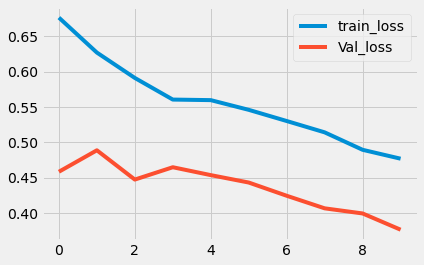

Epoch 1/20
38/38 - 0s - loss: 0.4528 - val_loss: 0.3686 - 344ms/epoch - 9ms/step
Epoch 2/20
38/38 - 0s - loss: 0.4489 - val_loss: 0.3583 - 265ms/epoch - 7ms/step
Epoch 3/20
38/38 - 0s - loss: 0.4481 - val_loss: 0.3522 - 271ms/epoch - 7ms/step
Epoch 4/20
38/38 - 0s - loss: 0.4442 - val_loss: 0.3549 - 277ms/epoch - 7ms/step
Epoch 5/20
38/38 - 0s - loss: 0.4378 - val_loss: 0.3442 - 265ms/epoch - 7ms/step
Epoch 6/20
38/38 - 0s - loss: 0.4357 - val_loss: 0.3586 - 274ms/epoch - 7ms/step
Epoch 7/20
38/38 - 0s - loss: 0.4364 - val_loss: 0.3451 - 268ms/epoch - 7ms/step
Epoch 8/20
38/38 - 0s - loss: 0.4162 - val_loss: 0.3513 - 297ms/epoch - 8ms/step
Epoch 9/20
38/38 - 0s - loss: 0.4253 - val_loss: 0.3536 - 265ms/epoch - 7ms/step
Epoch 10/20
38/38 - 0s - loss: 0.4384 - val_loss: 0.3421 - 300ms/epoch - 8ms/step
Epoch 11/20
38/38 - 0s - loss: 0.4313 - val_loss: 0.3446 - 285ms/epoch - 7ms/step
Epoch 12/20
38/38 - 0s - loss: 0.4240 - val_loss: 0.3400 - 256ms/epoch - 7ms/step
Epoch 13/20
38/38 - 0s - 

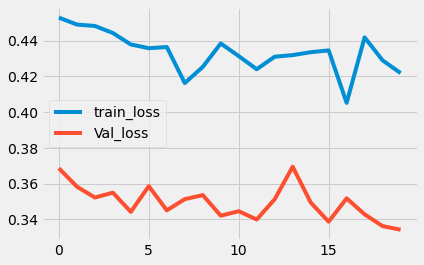

Epoch 1/30
38/38 - 0s - loss: 0.4167 - val_loss: 0.3411 - 259ms/epoch - 7ms/step
Epoch 2/30
38/38 - 0s - loss: 0.4156 - val_loss: 0.3436 - 238ms/epoch - 6ms/step
Epoch 3/30
38/38 - 0s - loss: 0.4233 - val_loss: 0.3364 - 230ms/epoch - 6ms/step
Epoch 4/30
38/38 - 0s - loss: 0.4313 - val_loss: 0.3533 - 243ms/epoch - 6ms/step
Epoch 5/30
38/38 - 0s - loss: 0.4184 - val_loss: 0.3528 - 237ms/epoch - 6ms/step
Epoch 6/30
38/38 - 0s - loss: 0.4357 - val_loss: 0.3333 - 232ms/epoch - 6ms/step
Epoch 7/30
38/38 - 0s - loss: 0.4231 - val_loss: 0.3352 - 235ms/epoch - 6ms/step
Epoch 8/30
38/38 - 0s - loss: 0.4275 - val_loss: 0.3386 - 228ms/epoch - 6ms/step
Epoch 9/30
38/38 - 0s - loss: 0.4055 - val_loss: 0.3345 - 226ms/epoch - 6ms/step
Epoch 10/30
38/38 - 0s - loss: 0.4228 - val_loss: 0.3447 - 245ms/epoch - 6ms/step
Epoch 11/30
38/38 - 0s - loss: 0.4140 - val_loss: 0.3326 - 241ms/epoch - 6ms/step
Epoch 12/30
38/38 - 0s - loss: 0.4215 - val_loss: 0.3329 - 239ms/epoch - 6ms/step
Epoch 13/30
38/38 - 0s - 

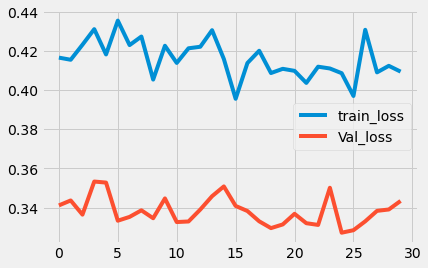

Epoch 1/40
38/38 - 0s - loss: 0.4071 - val_loss: 0.3302 - 225ms/epoch - 6ms/step
Epoch 2/40
38/38 - 0s - loss: 0.4066 - val_loss: 0.3418 - 212ms/epoch - 6ms/step
Epoch 3/40
38/38 - 0s - loss: 0.4098 - val_loss: 0.3363 - 220ms/epoch - 6ms/step
Epoch 4/40
38/38 - 0s - loss: 0.4042 - val_loss: 0.3278 - 213ms/epoch - 6ms/step
Epoch 5/40
38/38 - 0s - loss: 0.4074 - val_loss: 0.3179 - 205ms/epoch - 5ms/step
Epoch 6/40
38/38 - 0s - loss: 0.3968 - val_loss: 0.3187 - 215ms/epoch - 6ms/step
Epoch 7/40
38/38 - 0s - loss: 0.4018 - val_loss: 0.3385 - 215ms/epoch - 6ms/step
Epoch 8/40
38/38 - 0s - loss: 0.4002 - val_loss: 0.3519 - 233ms/epoch - 6ms/step
Epoch 9/40
38/38 - 0s - loss: 0.4056 - val_loss: 0.3400 - 223ms/epoch - 6ms/step
Epoch 10/40
38/38 - 0s - loss: 0.4186 - val_loss: 0.3358 - 231ms/epoch - 6ms/step
Epoch 11/40
38/38 - 0s - loss: 0.4072 - val_loss: 0.3364 - 215ms/epoch - 6ms/step
Epoch 12/40
38/38 - 0s - loss: 0.4040 - val_loss: 0.3234 - 210ms/epoch - 6ms/step
Epoch 13/40
38/38 - 0s - 

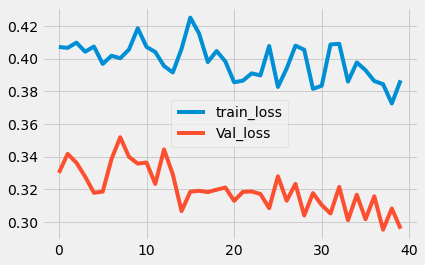

Epoch 1/50
38/38 - 0s - loss: 0.3861 - val_loss: 0.2985 - 406ms/epoch - 11ms/step
Epoch 2/50
38/38 - 0s - loss: 0.3749 - val_loss: 0.2982 - 277ms/epoch - 7ms/step
Epoch 3/50
38/38 - 0s - loss: 0.3726 - val_loss: 0.3155 - 282ms/epoch - 7ms/step
Epoch 4/50
38/38 - 0s - loss: 0.3838 - val_loss: 0.2959 - 266ms/epoch - 7ms/step
Epoch 5/50
38/38 - 0s - loss: 0.4257 - val_loss: 0.3003 - 304ms/epoch - 8ms/step
Epoch 6/50
38/38 - 0s - loss: 0.3974 - val_loss: 0.2916 - 254ms/epoch - 7ms/step
Epoch 7/50
38/38 - 0s - loss: 0.3843 - val_loss: 0.2940 - 285ms/epoch - 7ms/step
Epoch 8/50
38/38 - 0s - loss: 0.3812 - val_loss: 0.2958 - 315ms/epoch - 8ms/step
Epoch 9/50
38/38 - 0s - loss: 0.3661 - val_loss: 0.2973 - 310ms/epoch - 8ms/step
Epoch 10/50
38/38 - 0s - loss: 0.3589 - val_loss: 0.2978 - 313ms/epoch - 8ms/step
Epoch 11/50
38/38 - 0s - loss: 0.3501 - val_loss: 0.2924 - 292ms/epoch - 8ms/step
Epoch 12/50
38/38 - 0s - loss: 0.3938 - val_loss: 0.2897 - 300ms/epoch - 8ms/step
Epoch 13/50
38/38 - 0s -

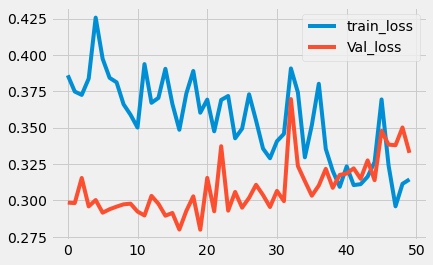

In [21]:
l=[10,20,30,40,50]
for i in l:
    call(i)

In [22]:
#Taking predictions
Y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)

print(mse)
rmse = np.sqrt(mse)
print(rmse)

2/2 [==============================] - 0s 3ms/step
0.3327325940130939
0.5768297790623278


In [23]:
Y_predicted = scaler.inverse_transform(Y_pred)
print('y_predicted',Y_pred.shape)
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)
print('scaled Values shape', scaled_data.shape)

y_predicted (61, 1)
X_train (300, 4, 1)
X_test (61, 4, 1)
scaled Values shape (365, 1)


In [24]:
#Scaling back to the original scale
d = scaled_data[:300,:]
print('dummy',d.shape)
print('Y_pred',Y_pred.shape)
Y_predicted = np.concatenate((Y_pred,d[:61,1:]), axis =1)
print('concat y_pred',Y_pred.shape)
Y_tested = np.concatenate((Y_test, d[:61,1:]), axis = 1)
print('concat Y_test', Y_test.shape)

dummy (300, 1)
Y_pred (61, 1)
concat y_pred (61, 1)
concat Y_test (61, 1)


In [25]:
#Take inverse transform
Y_predicted = scaler.inverse_transform(Y_predicted)
Y_tested = scaler.inverse_transform(Y_tested)
Y_predicted = Y_predicted[:,0:1]
Y_tested = Y_tested[:,0:1]
print('Y_tested', Y_tested.shape)
print('Y_predicted', Y_predicted.shape)

Y_tested (61, 1)
Y_predicted (61, 1)


In [26]:
#Calculate error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_tested, Y_predicted)
print(mse)
rmse = np.sqrt(mse)
print(rmse)

1138.8813530501925
33.74731623477921


In [27]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_tested, Y_predicted)
r2

0.09760933946878037

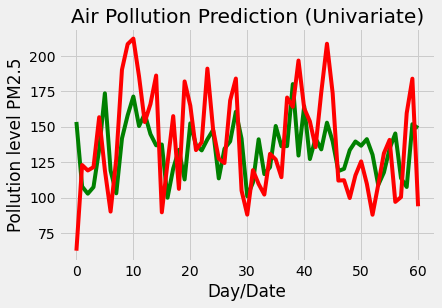

In [28]:
#Plot the graph between actual vs predicted values => 100 days
plt.plot(Y_predicted[:65,:], color= 'green')
plt.plot(Y_tested[:65,:] , color = 'red')
plt.title("Air Pollution Prediction (Univariate)")
plt.xlabel("Day/Date")
plt.ylabel("Pollution level PM2.5")
plt.show()

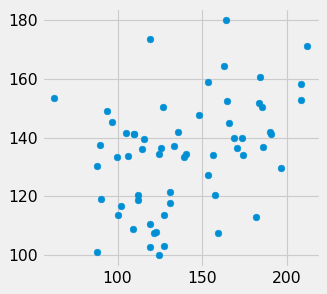

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4),dpi=80)
plt.scatter(Y_tested,Y_predicted)
plt.show()

<AxesSubplot:>

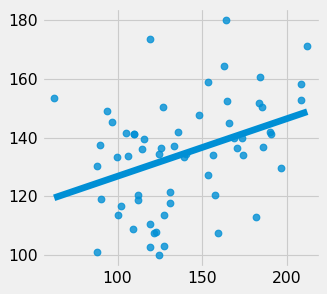

In [30]:
import seaborn as sb
plt.figure(figsize=(4,4),dpi=80)
sb.regplot(Y_tested,Y_predicted,ci=None)

In [31]:
Y_tested

array([[ 62.51],
       [122.99],
       [119.15],
       [121.51],
       [156.75],
       [119.35],
       [ 90.12],
       [127.45],
       [190.3 ],
       [208.38],
       [212.24],
       [185.52],
       [153.34],
       [165.98],
       [186.18],
       [ 89.62],
       [124.41],
       [157.53],
       [106.16],
       [182.02],
       [164.96],
       [133.53],
       [139.15],
       [191.06],
       [148.25],
       [127.43],
       [124.4 ],
       [168.62],
       [184.06],
       [104.97],
       [ 87.96],
       [119.38],
       [109.6 ],
       [102.12],
       [130.88],
       [126.91],
       [114.4 ],
       [170.65],
       [164.13],
       [196.77],
       [163.05],
       [153.8 ],
       [135.65],
       [174.35],
       [208.62],
       [173.71],
       [112.01],
       [112.27],
       [ 99.7 ],
       [115.73],
       [125.57],
       [109.78],
       [ 87.9 ],
       [109.02],
       [131.3 ],
       [140.78],
       [ 96.99],
       [100.37],
       [159.59

In [32]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(Y_tested, Y_predicted)
print('MAPE', mape)

MAPE 21.58375171215602


In [33]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_tested, Y_predicted)
r2

0.09760933946878037

In [34]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_tested, Y_predicted)
#print('Mean squared error', mse)
print('RMSE' , np.sqrt(mse))
print("Mean of Test data ", np.mean(Y_tested))
print("Mean of pred data ", np.mean(Y_predicted))

RMSE 33.74731623477921
Mean of Test data  138.9962295081967
Mean of pred data  134.47357135876715


array([<AxesSubplot:xlabel='Date'>], dtype=object)

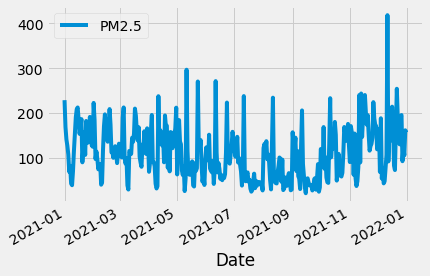

In [35]:
# A simple plot to visualize the correlation between the columns
df.plot(subplots=True)
#df.plot(subplots=True,figsize=(15,13));